In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Questão 2

In [7]:
def ode_passo_unico(t0, tf, n, f, PHI, y0):
    y = np.zeros(n)
    y[0] = y0
    delta = (tf - t0) / n
    t = 0
    ts =[]
    ts.append(t)
    for k in range(0, n-1):
        y[k+1] = y[k] + delta * PHI(t, y[k], delta, f)
        t = t + delta
        ts.append(t)
        
    return ts,y

In [8]:
def phi_euler_modificado(tk, yk, delta, f):
    return 0.5 * (f(tk, yk) + f(tk + delta, yk + delta*f(tk, yk)))

def phi_euler(tk, yk, delta, f):
    return f(tk, yk)


In [9]:
def f2(tk, yk):
    return -100*yk 

In [10]:
def x(t):
    return math.exp(-100*t)

Vamos visualizar o gráfico da solução exata: 

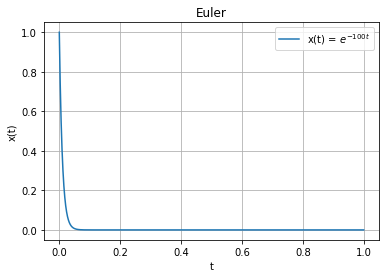

In [29]:
plt.figure()

ts = np.arange(0,1, 0.001)
xs = []
for t in ts:
    xs.append(x(t))
    
plt.plot(ts, xs, label = 'x(t) = $e^{-100t}$')
plt.title('Euler')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

Agora, vamos aproximar a solução de $\dot{x}(t) = -100x(t)$, com $x(0) = 1$, que tem solução exata $x(t) = e^{-100t}$, utilizando o método de Euler Explícito, com $\Delta t = 0.1/2^{m}, m = 0, 1, 2, 3, 4, 5$, com $t \in [0,1]$. Como nossa função calcula $\Delta t$ a partir de $t_{0}, t_{f}$ e $n$, podemos converter os valores de modo a expressar os valores de $\Delta t$ em função desses parâmetros. Temos: $\Delta t = \dfrac{0.1}{2^m} = \dfrac{t_{f} - t{0}}{n} = \dfrac{1 - 0}{n}$, dado que estamos aproximando a EDO no intervalo $[0,1]$. Daí: $\dfrac{0.1}{2^m} = \dfrac{1}{10\cdot2^{m}} = \dfrac{1}{n} \Rightarrow n = 10\cdot2^{m}$. Pelos valores de $m$ propostos no exercício, temos os valores correspondentes de $n$: 

$n = 10, 20, 40, 80, 160, 320$.

Abaixo, vamos analisar os gráficos das aproximações para os valores de $n$ descritos acima.

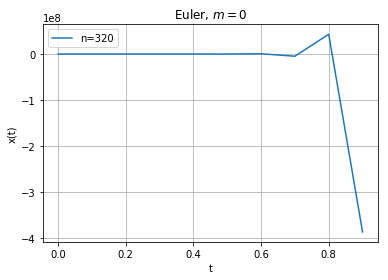

In [55]:
T, X_ = ode_passo_unico(0.0, 1.0, 10, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n='+str(n))

plt.title('Euler, $m = 0 $')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

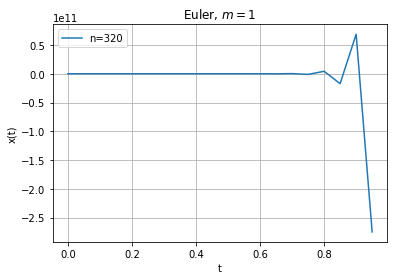

In [56]:
T, X_ = ode_passo_unico(0.0, 1.0, 20, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n='+str(n))

plt.title('Euler, $m = 1$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

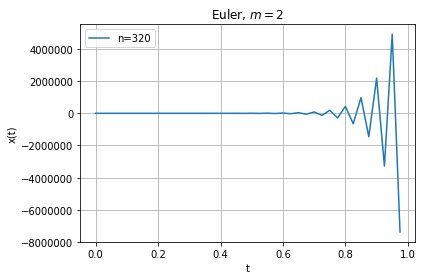

In [57]:
T, X_ = ode_passo_unico(0.0, 1.0, 40, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n='+str(n))

plt.title('Euler, $m = 2$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

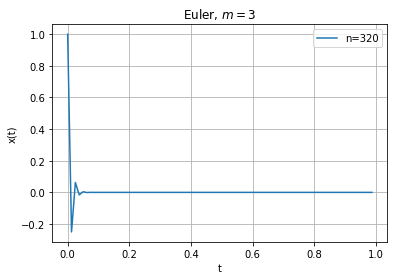

In [58]:
T, X_ = ode_passo_unico(0.0, 1.0, 80, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n='+str(n))

plt.title('Euler, $m = 3$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

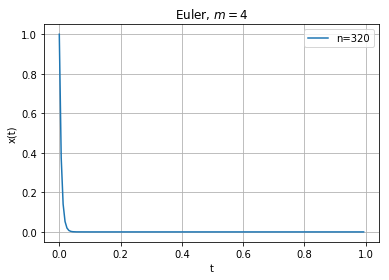

In [59]:
T, X_ = ode_passo_unico(0.0, 1.0, 160, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n='+str(n))

plt.title('Euler, $m = 4$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

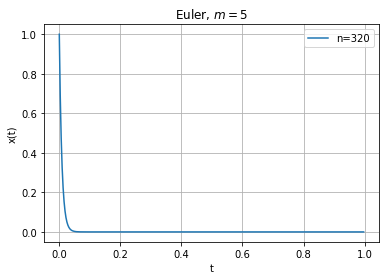

In [60]:
T, X_ = ode_passo_unico(0.0, 1.0, 320, f2, phi_euler, 1.0)

plt.figure()
plt.plot(T, X_, label = 'n='+str(n))

plt.title('Euler, $m = 5$')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.grid(True)
plt.legend()
plt.show()

Notamos que, conforme $m$ cresce, o gráfico da proximação se aproxima do gráfico da solução exata. Os valores de $m = 0, 1$ e $2$ apresentam forte instabilidade, pois, como veremos, os valores correspondentes de $\Delta t$ não estão no intervalo estável.

O método de euler visto acima é tal que:

$$
y_{k+1} = y_{k} + \Delta t f(t_{k}, y_{k}) = y_{k} + \Delta t (-100y_k) = y_{k}(1 -100 \Delta t) = y_{0}(1 - 100 \Delta t)^{k+1} \Rightarrow y_k = (1-100\Delta t)^k
$$

Pois $y_0 = y(0) = 1$. Para que o método convirja, devemos ter que $| 1 - 100\Delta t | < 1$ => $\Delta t \in (0, 0.02)$.

Note que para $m = 0, 1$ e $2$, $\Delta t = 0.1, 0.05$ e $0.025$, respectivamente. Daí, segue que, para esses valores, o método de Euler Explícito não converge.